In [112]:
import numpy as np
from sklearn import svm
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
datos = pd.read_excel("E-Commerce_train.xlsx")
datos = datos.drop(["ID"], axis=1)
columns_spanish = ["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos","A_Tiempo"]
datos.columns = columns_spanish
datos.head(3)

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos,A_Tiempo
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1


In [43]:
# Separamos la ultima columna para que sea variable destino
datos_y = datos[datos.columns[-1]]
datos_y.head()

0    1
1    1
2    1
3    1
4    1
Name: A_Tiempo, dtype: int64

In [44]:
datos["Bloque_de_Almacen"].replace(["A", "B", "C", "D", "F"], [ 1, 2, 3, 4, 5], inplace = True)
datos["Modo_de_Envio"].replace(["Ship", "Flight", "Road"], [10, 20, 30,], inplace = True)
datos["Importancia_del_producto"].replace(["low", "medium", "high"], [10, 20, 30,], inplace = True)
datos["Genero"].replace(["F", "M"], [1, 0 ], inplace = True)

In [45]:
datos.head()

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos,A_Tiempo
0,4,20,4,2,177,3,10,1,44,1233,1
1,5,20,4,5,216,2,10,0,59,3088,1
2,1,20,2,2,183,4,10,0,48,3374,1
3,2,20,3,3,176,4,20,0,10,1177,1
4,3,20,2,2,184,3,20,1,46,2484,1


In [46]:
datos_x = datos[["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos"]]

In [47]:
datos_x = datos_x.to_numpy()

In [48]:
#Normalización de Datos:
prom = datos_x.mean(axis=0)
desv = datos_x.std(axis=0)

datos_x = (datos_x - prom)/desv

In [56]:
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, train_size=0.8, test_size=0.2, random_state=100)

In [57]:
model = svm.SVC(kernel='linear', C=100).fit(X_train, y_train)

In [58]:
score = model.score(X_test, y_test)
print(score)

0.6777777777777778


### Matrix de Confusión

In [111]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [116]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      2639
           1       0.83      0.66      0.73      4560

    accuracy                           0.70      7199
   macro avg       0.70      0.71      0.69      7199
weighted avg       0.73      0.70      0.70      7199



In [115]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.76      0.63       641
           1       0.82      0.64      0.72      1159

    accuracy                           0.68      1800
   macro avg       0.68      0.70      0.67      1800
weighted avg       0.72      0.68      0.68      1800



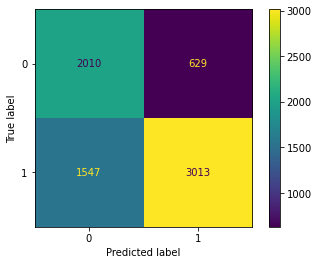

In [113]:
cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Probando:

In [86]:
datos_test = pd.read_excel("E-Commerce_test.xlsx")
datos_test = datos_test.drop(["ID"], axis=1)
columns_spanish = ["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos",]
datos_test.columns = columns_spanish
datos_test.head(3)

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos
0,F,Ship,5,1,189,2,medium,M,10,5248
1,D,Ship,5,3,150,2,high,F,9,4446
2,F,Ship,3,3,200,3,low,M,3,5739


In [87]:
datos_test["Bloque_de_Almacen"].replace(["A", "B", "C", "D", "F"], [ 1, 2, 3, 4, 5], inplace = True)
datos_test["Modo_de_Envio"].replace(["Ship", "Flight", "Road"], [10, 20, 30,], inplace = True)
datos_test["Importancia_del_producto"].replace(["low", "medium", "high"], [10, 20, 30,], inplace = True)
datos_test["Genero"].replace(["F", "M"], [1, 0 ], inplace = True)

In [88]:
prom_test = datos_test.mean(axis=0)
desv_test = datos_test.std(axis=0)

datos_test = (datos_test - prom_test)/desv_test

In [89]:
datos_test

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos
0,1.117126,-0.649818,0.676219,-1.391743,-0.616256,-1.251263,0.727111,-1.004761,1.509972,0.814256
1,0.446381,-0.649818,0.676219,0.020836,-1.457929,-1.251263,2.390980,0.994764,1.165701,0.344642
2,1.117126,-0.649818,-1.083623,0.020836,-0.378861,-0.563756,-0.936758,-1.004761,-0.899924,1.101763
3,-1.565854,-0.649818,0.676219,-1.391743,-1.824812,-1.251263,0.727111,-1.004761,-1.588466,0.459996
4,-0.895109,-0.649818,-0.203702,-0.685454,0.916021,-0.563756,-0.936758,-1.004761,-0.555653,0.964158
...,...,...,...,...,...,...,...,...,...,...
1995,-1.565854,-0.649818,-0.203702,-1.391743,0.743370,0.811259,0.727111,0.994764,-1.588466,-1.358149
1996,-0.895109,-0.649818,-0.203702,-1.391743,0.311743,0.811259,0.727111,0.994764,0.132889,-1.528546
1997,-0.224364,-0.649818,0.676219,0.727125,0.527556,0.811259,-0.936758,0.994764,-0.555653,-1.582417
1998,1.117126,-0.649818,0.676219,-0.685454,0.117511,1.498766,0.727111,-1.004761,-1.244195,-1.550211


In [90]:
datos_test = datos_test.to_numpy()

In [91]:
datos_test[0]

array([ 1.11712597, -0.64981834,  0.67621946, -1.39174318, -0.61625582,
       -1.2512632 ,  0.72711079, -1.00476128,  1.50997193,  0.81425585])

In [98]:
predicts = model.predict(datos_test)
predicts

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [100]:
predicts

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [101]:
df = pd.DataFrame(predicts) #convert to a dataframe


In [105]:
columna_pred = ["pred"]
df.columns = columna_pred

In [107]:
df.to_csv("salida_svm.csv",index=False)